# Netflix Recommendation

## **Deskripsi Proyek**

Proyek ini bertujuan untuk mengembangkan sistem rekomendasi konten Netflix yang dapat membantu pengguna menemukan film dan acara TV yang sesuai dengan preferensi mereka. Dengan meningkatnya jumlah konten yang tersedia di platform streaming, pengguna sering kali kesulitan menemukan konten yang mereka sukai. Sistem rekomendasi yang efektif dapat meningkatkan pengalaman pengguna dan membantu mereka menemukan konten yang relevan.

### Problem Statements
1. Bagaimana cara membantu pengguna menemukan konten yang relevan dari ribuan judul yang tersedia di Netflix?
2. Bagaimana cara memberikan rekomendasi yang personal berdasarkan preferensi genre dan karakteristik konten yang disukai pengguna?
3. Bagaimana mengukur kualitas dan relevansi rekomendasi yang diberikan?

### Goals
1. Mengembangkan sistem rekomendasi yang dapat memberikan saran konten yang relevan kepada pengguna
2. Memanfaatkan informasi genre dan deskripsi konten untuk memberikan rekomendasi yang sesuai
3. Mengevaluasi efektivitas sistem rekomendasi menggunakan metrik yang sesuai

### Solution Approach

#### 1. Content-based Filtering
- Menggunakan karakteristik konten (judul, deskripsi, genre) untuk memberikan rekomendasi
- Menggunakan TF-IDF dan Cosine Similarity untuk menghitung kemiripan antar konten
- Kelebihan: Dapat memberikan rekomendasi tanpa data rating pengguna
- Kekurangan: Tidak mempertimbangkan preferensi komunitas pengguna

#### 2. Collaborative Filtering (Alternatif Pendekatan)
- Menggunakan pola rating pengguna untuk memberikan rekomendasi
- Memanfaatkan kesamaan preferensi antar pengguna
- Kelebihan: Dapat menemukan konten yang tidak obvious dari karakteristik konten
- Kekurangan: Membutuhkan data rating pengguna yang cukup banyak

Dalam proyek ini, pendekatan Content-based Filtering dipilih karena keterbatasan data rating pengguna dan kemampuannya untuk memberikan rekomendasi berdasarkan karakteristik konten yang tersedia.



# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Data Understanding

## Data Loading

In [2]:
df = pd.read_csv('https://github.com/potaHere/submssion-Machine-Learning-Terapan/raw/refs/heads/main/netflix_titles.csv', encoding='latin1')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Exploratory Data Analysis

cek dimensi dataframe

In [13]:
dim = df.shape
print(f'Jumlah baris: {dim[0]}')
print(f'Jumlah kolom: {dim[1]}')

Jumlah baris: 8809
Jumlah kolom: 26


dataframe memiliki dimensi 8809 baris dan 26 kolom.

In [14]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


terdapat beberapa fitur yang tidak memiliki nilai.

In [15]:
df.duplicated().sum()

np.int64(0)

tidak ditemukan duplikasi data

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8809 entries, 0 to 8808
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       8809 non-null   object 
 1   type          8809 non-null   object 
 2   title         8809 non-null   object 
 3   director      6175 non-null   object 
 4   cast          7984 non-null   object 
 5   country       7978 non-null   object 
 6   date_added    8799 non-null   object 
 7   release_year  8809 non-null   int64  
 8   rating        8805 non-null   object 
 9   duration      8806 non-null   object 
 10  listed_in     8809 non-null   object 
 11  description   8809 non-null   object 
 12  Unnamed: 12   0 non-null      float64
 13  Unnamed: 13   0 non-null      float64
 14  Unnamed: 14   0 non-null      float64
 15  Unnamed: 15   0 non-null      float64
 16  Unnamed: 16   0 non-null      float64
 17  Unnamed: 17   0 non-null      float64
 18  Unnamed: 18   0 non-null    

dataframe mengandung metadata:
1. show_id: id unik untuk setiap judul.
2. type: Kategori judul, baik 'Movie' atau 'TV Show'.
3. title: Nama movie atau TV show.
4. director: Kategori judul, baik 'Movie' atau 'TV Show'.
5. cast: Daftar aktor/aktris utama dalam judul.
6. country: Negara atau negara-negara tempat film atau acara TV diproduksi.
7. date_added: Tanggal judul ditambahkan ke Netflix.
8. release_year: Tahun film atau acara TV pertama kali dirilis.
9. rating: Peringkat usia judul.
10. duration: Durasi judul, dalam menit untuk film dan jumlah musim untuk acara TV.
11. listed_in: Genre-genre tempat judul tersebut dikategorikan.
12. description: Ringkasan singkat tentang judul.

In [17]:
df.describe()

,release_year,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
count,8809.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,2014.181292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,8.818932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1925.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2017.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2019.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,2024.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Fungsi `describe()` memberikan informasi statistik pada masing-masing kolom, diantaranya:

- `Count` adalah jumlah sampel pada data.
- `Mean` adalah nilai rata-rata.
- `Std` adalah standar deviasi.
- `Min` yaitu nilai minimum setiap kolom.
- `25%` adalah kuartil pertama. Kuartil adalah nilai yang menandai batas interval dalam empat bagian sebaran yang sama.
- `50%` adalah kuartil kedua, atau biasa juga disebut median (nilai tengah).
-` 75%` adalah kuartil ketiga.
- `Max` adalah nilai maksimum.

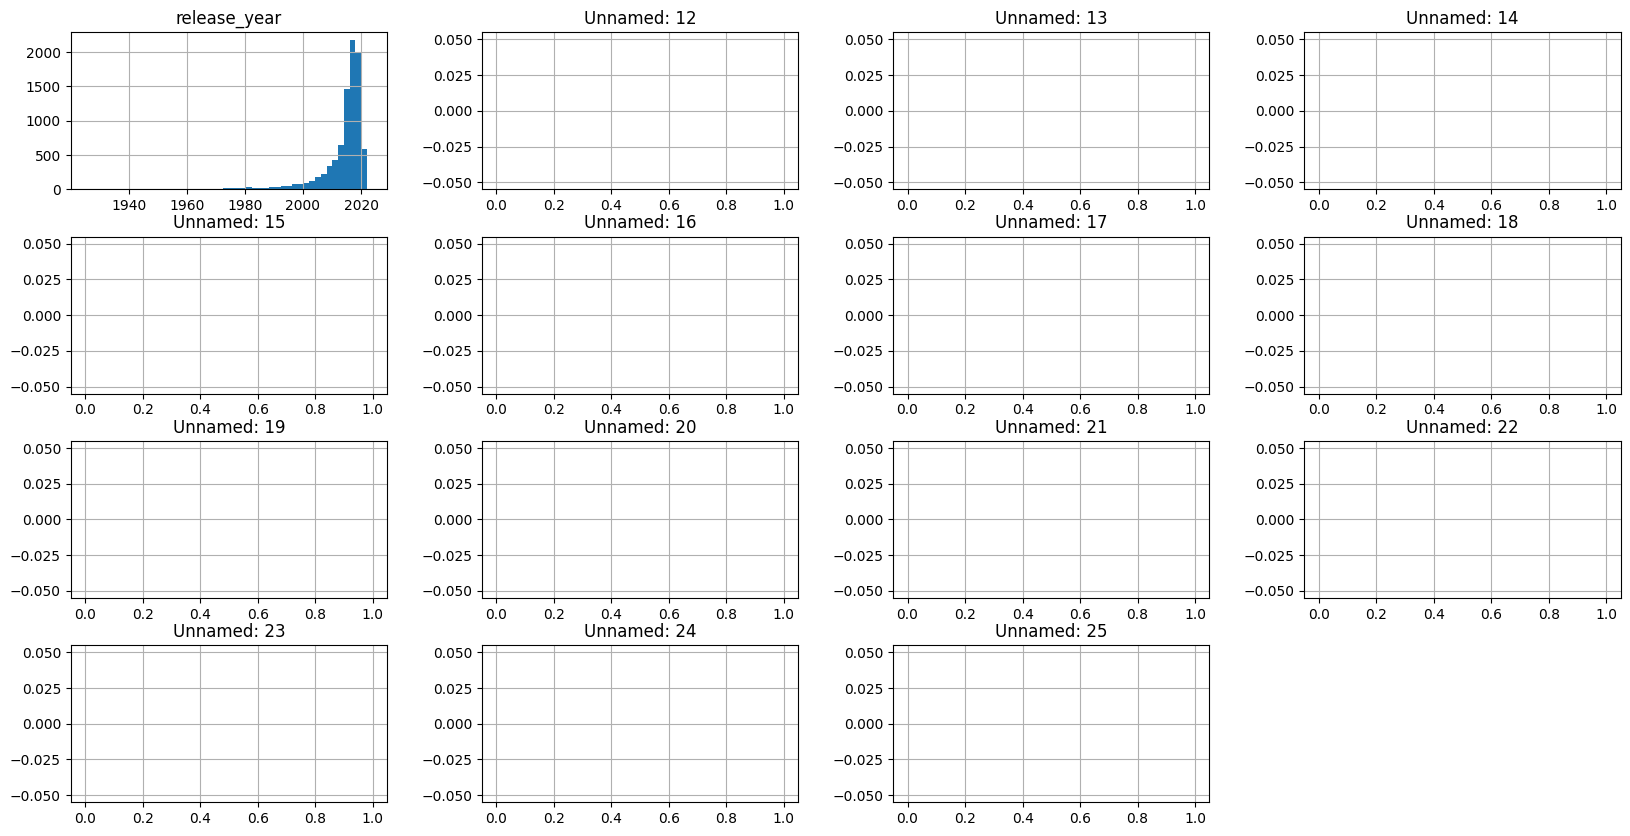

In [18]:
df.hist(figsize=(20,10), bins=50)
plt.show()

histogram untuk menunjukkan distribusi data pada fitur numerik (khususnya integer).

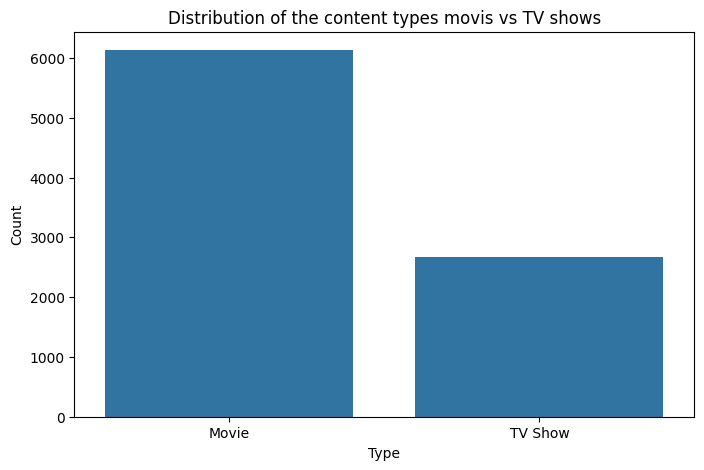

In [19]:
plt.figure(figsize=(8,5))
sns.countplot(x='type',data=df)
plt.title("Distribution of the content types movis vs TV shows")
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

distribusi untuk kolom type menunjukkan lebih banyak movie dari pada tv show.

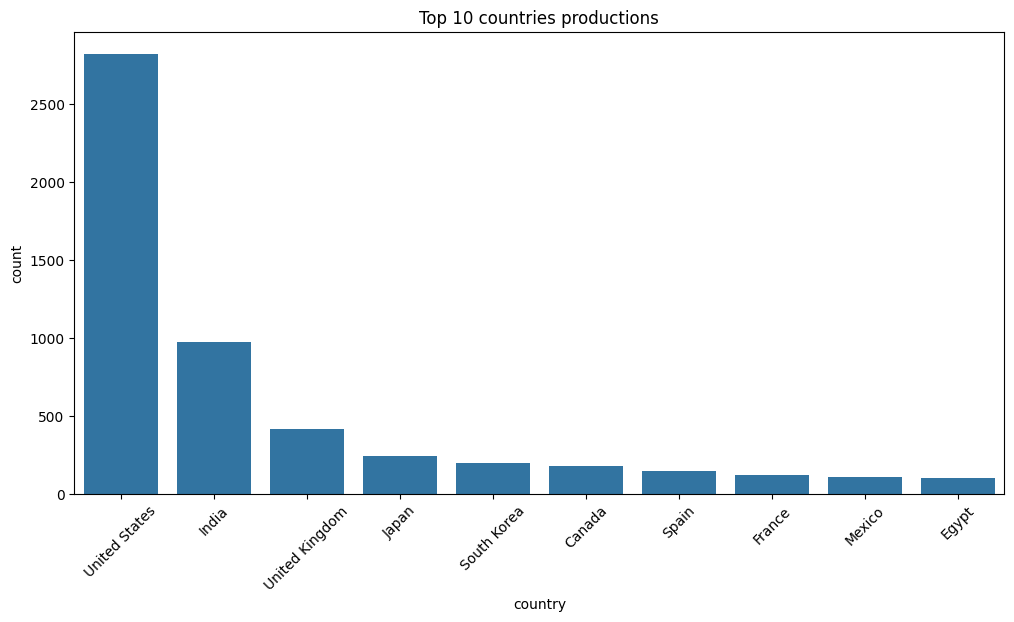

In [20]:
country_count=df['country'].value_counts().head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=country_count.index,y=country_count.values)
plt.title('Top 10 countries productions')
plt.xlabel('country')
plt.ylabel('count')
plt.xticks(rotation=45)
plt.show()

negara US merupakan negara terbanyak untuk produksi.

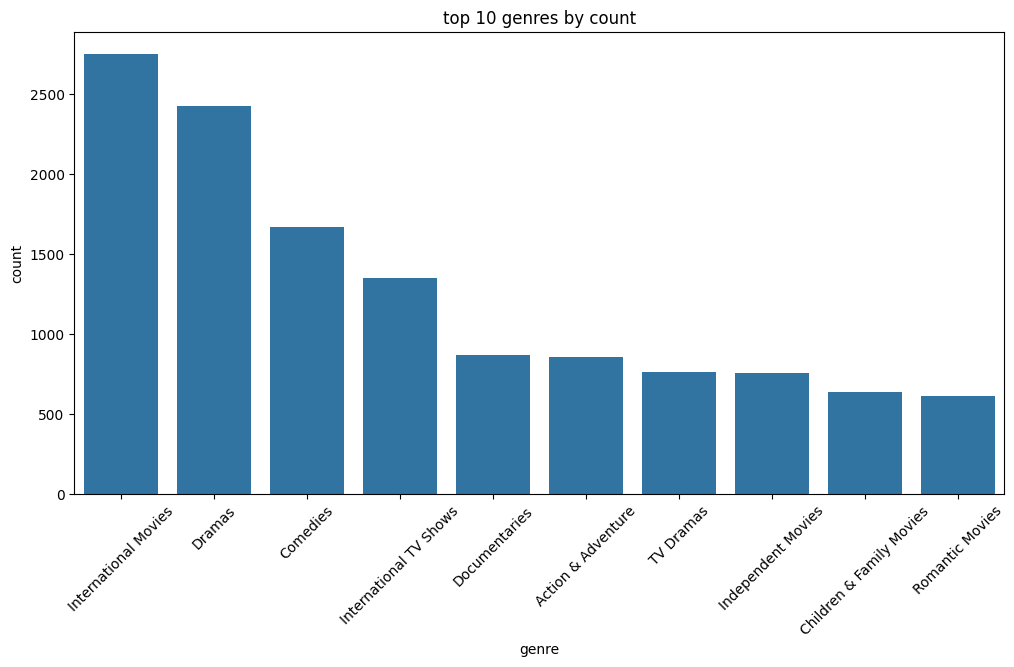

In [21]:
df['listed_in']=df['listed_in'].str.split(', ')
genres=df['listed_in'].explode().value_counts().head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=genres.index,y=genres.values)
plt.title('top 10 genres by count')
plt.xlabel('genre')
plt.ylabel('count')
plt.xticks(rotation=45)
plt.show()

genre internasional merupakan genre terbanyak yang ada di netflix, diikuti dengan drama dan komedi.

# Data Preprocessing

## feature engeneering

In [3]:
preprocessed_df = df.copy()

preprocessed_df['combined_features'] = df['title'] + ' ' + df['description'] + ' ' + df['listed_in']


Pada tahap feature engineering, kita menggabungkan beberapa fitur penting menjadi satu fitur yang akan digunakan untuk membangun model rekomendasi. Fitur yang digabungkan adalah:

1. Title (Judul) - Memberikan informasi tentang nama konten
2. Description (Deskripsi) - Memberikan konteks dan ringkasan konten
3. Listed_in (Genre) - Memberikan informasi kategori konten

Penggabungan ini dilakukan untuk menciptakan representasi yang kaya akan informasi tentang setiap konten. Dengan menggabungkan ketiga fitur ini, model dapat mempertimbangkan berbagai aspek konten saat menghitung kemiripan antar judul.

## TF-IDF

In [4]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(preprocessed_df['combined_features'])

mengubah dari jenis data dari text ke bentuk vector.

TF-IDF (Term Frequency-Inverse Document Frequency) digunakan untuk mengubah teks menjadi representasi numerik. Proses ini penting karena:

1. Term Frequency (TF) menghitung frekuensi kemunculan kata dalam sebuah dokumen
2. Inverse Document Frequency (IDF) memberikan bobot lebih tinggi pada kata-kata yang jarang muncul di seluruh dokumen
3. Kombinasi TF-IDF membantu mengidentifikasi kata-kata yang penting dan unik untuk setiap konten

Dalam konteks sistem rekomendasi, TF-IDF membantu menemukan kemiripan konten berdasarkan kata-kata penting yang mereka miliki bersama.

# Modeling

Pada tahap pemodelan, kita menggunakan pendekatan Content-based Filtering


In [5]:
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Membuat dataframe indices yang memetakan judul ke index
indices = pd.Series(preprocessed_df.index, index=preprocessed_df['title']).drop_duplicates()

# Fungsi untuk mendapatkan rekomendasi berdasarkan judul
def get_recommendations(title, cosine_sim=cosine_sim):
    # Mendapatkan index dari judul
    try:
        idx = indices[title]
    except:
        return "Title not found. Please check the title and try again."

    # Mendapatkan skor kesamaan dari semua film dengan film tersebut
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Mengurutkan film berdasarkan skor kesamaan
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Mendapatkan 10 film yang paling mirip (tidak termasuk film itu sendiri)
    sim_scores = sim_scores[1:11]

    # Mendapatkan index film
    movie_indices = [i[0] for i in sim_scores]

    # Mengembalikan 10 film yang paling mirip
    return preprocessed_df[['title', 'type', 'listed_in', 'release_year']].iloc[movie_indices]

# Contoh penggunaan fungsi rekomendasi
contoh_film = 'Stranger Things'
rekomendasi = get_recommendations(contoh_film)
print(f"Rekomendasi untuk '{contoh_film}':\n")
rekomendasi

Rekomendasi untuk 'Stranger Things':



,title,type,listed_in,release_year
5200,Beyond Stranger Things,TV Show,"Stand-Up Comedy & Talk Shows, TV Mysteries, TV...",2017
3986,The OA,TV Show,"TV Dramas, TV Mysteries, TV Sci-Fi & Fantasy",2019
4733,Rowdy Rathore,Movie,"Action & Adventure, Comedies, International Mo...",2012
2979,THE STRANGER,TV Show,"British TV Shows, Crime TV Shows, Internationa...",2020
1335,The Sinner,TV Show,"Crime TV Shows, TV Dramas, TV Mysteries",2020
241,Manifest,TV Show,"TV Dramas, TV Mysteries, TV Sci-Fi & Fantasy",2021
8083,Star-Crossed,TV Show,"Romantic TV Shows, TV Dramas, TV Sci-Fi & Fantasy",2014
1487,Sakho & Mangane,TV Show,"Crime TV Shows, International TV Shows, TV Dramas",2019
6167,Anjaan: Special Crimes Unit,TV Show,"International TV Shows, TV Horror, TV Mysteries",2018
887,The Strange House,Movie,"Horror Movies, International Movies, Thrillers",2020


# Evaluasi Model

Dalam proyek ini, kita menggunakan dua metrik evaluasi untuk mengukur kualitas rekomendasi:



### 1. Genre-based Similarity


Evaluasi untuk 'Stranger Things'
Genre: tv horror, tv mysteries, tv sci-fi & fantasy
Rata-rata kesamaan genre: 0.24


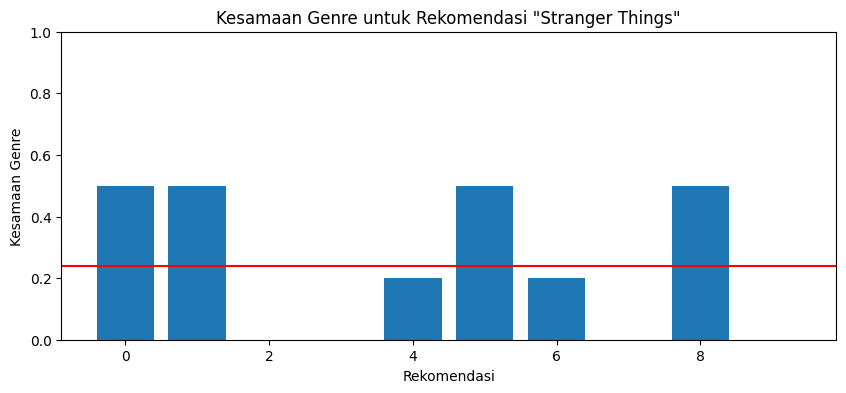


Evaluasi untuk 'The Crown'
Genre: british tv shows, international tv shows, tv dramas
Rata-rata kesamaan genre: 0.37


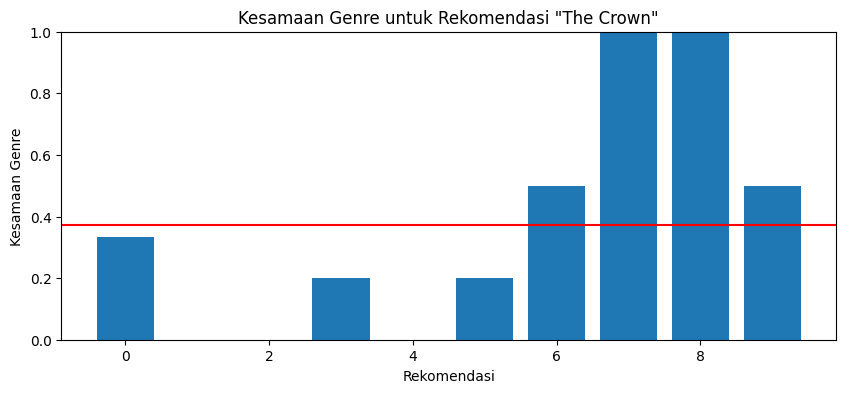


Evaluasi untuk 'Narcos'
Genre: crime tv shows, tv action & adventure, tv dramas
Rata-rata kesamaan genre: 0.42


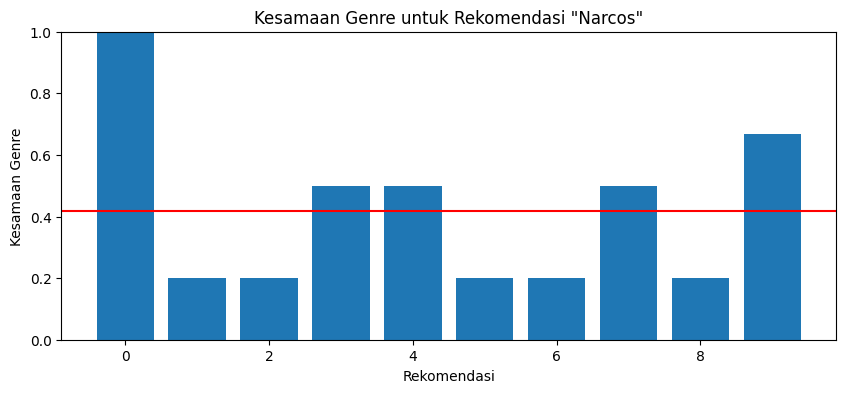

In [6]:
# Fungsi untuk mengevaluasi hasil rekomendasi berdasarkan genre
def evaluate_recommendations_by_genre(title, recommendations):
    # Mendapatkan genre dari judul input
    try:
        input_idx = indices[title]
        input_genres = preprocessed_df.iloc[input_idx]['listed_in'].split(',')
        input_genres = [genre.strip().lower() for genre in input_genres]

        # Menghitung kesamaan genre untuk setiap rekomendasi
        genre_similarities = []
        for idx, row in recommendations.iterrows():
            rec_genres = row['listed_in'].split(',')
            rec_genres = [genre.strip().lower() for genre in rec_genres]

            # Menghitung intersection antara genre input dan rekomendasi
            common_genres = set(input_genres).intersection(set(rec_genres))
            similarity = len(common_genres) / len(set(input_genres).union(set(rec_genres)))
            genre_similarities.append(similarity)

        # Menghitung rata-rata kesamaan genre
        avg_genre_similarity = sum(genre_similarities) / len(genre_similarities)
        return {
            'input_title': title,
            'input_genres': input_genres,
            'avg_genre_similarity': avg_genre_similarity,
            'genre_similarities': genre_similarities
        }
    except:
        return f"Title '{title}' not found."

# Evaluasi untuk beberapa judul
judul_evaluasi = ['Stranger Things', 'The Crown', 'Narcos']

for judul in judul_evaluasi:
    try:
        rekomendasi = get_recommendations(judul)
        hasil_evaluasi = evaluate_recommendations_by_genre(judul, rekomendasi)

        if isinstance(hasil_evaluasi, dict):
            print(f"\nEvaluasi untuk '{judul}'")
            print(f"Genre: {', '.join(hasil_evaluasi['input_genres'])}")
            print(f"Rata-rata kesamaan genre: {hasil_evaluasi['avg_genre_similarity']:.2f}")

            # Visualisasi kesamaan genre
            plt.figure(figsize=(10, 4))
            plt.bar(range(len(hasil_evaluasi['genre_similarities'])),
                    hasil_evaluasi['genre_similarities'])
            plt.axhline(y=hasil_evaluasi['avg_genre_similarity'], color='r', linestyle='-')
            plt.xlabel('Rekomendasi')
            plt.ylabel('Kesamaan Genre')
            plt.title(f'Kesamaan Genre untuk Rekomendasi "{judul}"')
            plt.ylim(0, 1)
            plt.show()
        else:
            print(hasil_evaluasi)
    except Exception as e:
        print(f"Error evaluating '{judul}': {e}")

- Mengukur seberapa mirip genre antara item yang direkomendasikan dengan item input
- Dihitung menggunakan Jaccard Similarity: |A∩B| / |A∪B|
  * A = set genre item input
  * B = set genre item rekomendasi
- Rentang nilai: 0 (tidak ada genre yang sama) hingga 1 (genre persis sama)
- Kelebihan: Mengukur relevansi rekomendasi berdasarkan kategori konten

### 2. Precision@K

Precision@10 untuk 'Stranger Things': 0.60 (6/10 rekomendasi relevan)
Precision@10 untuk 'The Crown': 0.70 (7/10 rekomendasi relevan)
Precision@10 untuk 'Narcos': 1.00 (10/10 rekomendasi relevan)


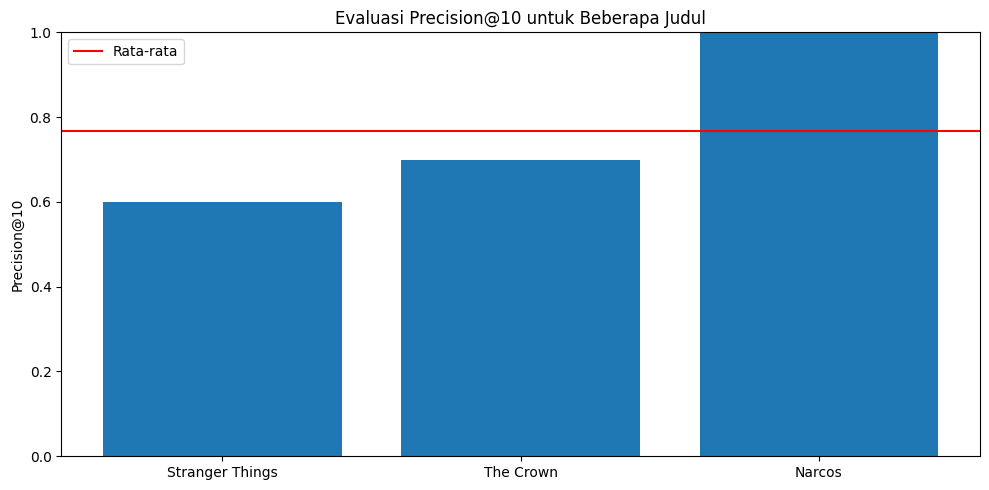

In [7]:
# Precision at K
def precision_at_k(title, k=10):
    try:
        # Mendapatkan genre dari judul input
        input_idx = indices[title]
        input_genres = preprocessed_df.iloc[input_idx]['listed_in'].split(',')
        input_genres = [genre.strip().lower() for genre in input_genres]

        # Mendapatkan rekomendasi
        rekomendasi = get_recommendations(title)

        # Menghitung jumlah rekomendasi yang relevan (memiliki minimal satu genre yang sama)
        relevant_count = 0
        for idx, row in rekomendasi.iterrows():
            rec_genres = row['listed_in'].split(',')
            rec_genres = [genre.strip().lower() for genre in rec_genres]

            # Jika ada minimal satu genre yang sama, dianggap relevan
            if set(input_genres).intersection(set(rec_genres)):
                relevant_count += 1

        # Menghitung precision@k
        precision = relevant_count / k
        return {
            'title': title,
            'precision_at_k': precision,
            'relevant_count': relevant_count,
            'total_recommendations': k
        }
    except:
        return f"Title '{title}' not found."

# Evaluasi precision@k untuk beberapa judul
precision_results = []
for judul in judul_evaluasi:
    result = precision_at_k(judul)
    if isinstance(result, dict):
        precision_results.append(result)
        print(f"Precision@10 untuk '{judul}': {result['precision_at_k']:.2f} ({result['relevant_count']}/{result['total_recommendations']} rekomendasi relevan)")
    else:
        print(result)

# Visualisasi hasil precision@k
if precision_results:
    plt.figure(figsize=(10, 5))
    titles = [r['title'] for r in precision_results]
    precisions = [r['precision_at_k'] for r in precision_results]

    plt.bar(titles, precisions)
    plt.axhline(y=sum(precisions)/len(precisions), color='r', linestyle='-', label='Rata-rata')
    plt.ylim(0, 1)
    plt.ylabel('Precision@10')
    plt.title('Evaluasi Precision@10 untuk Beberapa Judul')
    plt.legend()
    plt.tight_layout()
    plt.show()

- Mengukur proporsi rekomendasi yang relevan dari K rekomendasi teratas
- Formula: (Jumlah rekomendasi relevan) / K
- Rekomendasi dianggap relevan jika memiliki minimal satu genre yang sama
- K = 10 dalam implementasi ini
- Kelebihan: Mengukur akurasi rekomendasi dari perspektif pengguna